In [96]:
%pylab inline
from scipy.special import gamma

Populating the interactive namespace from numpy and matplotlib


In [178]:
def y(x):
    return 1 + 2*x 

def y2(x):
    return 1 + 2*x + 0.2*x**2

def data1(N_points):
    x1 = linspace(1.0, 4.0, N_points)
    y1 = y2(x1)
    dy = np.zeros(N_points)
    for i in range(N_points):
        dy[i] = np.random.normal(y1[i], 0.1, 1)
    return x1, dy


def data2(N_points):
    x1 = linspace(1.0, 4.0, N_points)
    y1 = y(x1)
    dy = np.zeros(N_points)
    for i in range(N_points):
        dy[i] = np.random.normal(y1[i], 0.1, 1)
    return x1, dy

In [179]:
N_points = 100

x1, dy = data1(N_points)
x1, dy2 = data1(N_points)

y1 = y(x1)

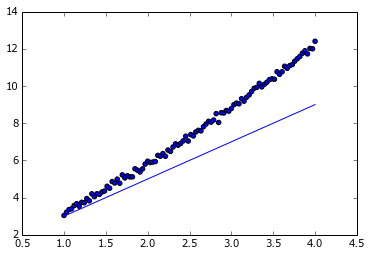

In [34]:
scatter(x1, dy)
plot(x1, y1)

In [123]:
def S(sigma):
    return sum(1.0/sigma**2.0)

def Sy(sigma, y):
    return sum(y/sigma**2.0)

def Sx(sigma, x):
    return sum(x/sigma**2.0)

def ti(sigma, x):
    S_x = Sx(sigma, x)
    SS = S(sigma)
    return (x - S_x/SS)/sigma 

def Stt(sigma, x):
    tt = ti(sigma, x)
    return sum(tt**2.0)

def b(sigma, x, y):
    tt = ti(sigma, x)
    S_tt = Stt(sigma, x)
    return sum(tt*y/sigma)/S_tt
    
def a(sigma, x, y):
    S_x = Sx(sigma, x)
    S_y = Sy(sigma, y)
    S_tt = Stt(sigma, x)
    t = ti(sigma, x)
    SS = S(sigma)
    bb = b(sigma, x, y)
    return (S_y - S_x*bb)/SS

def xisquare(sigma, x, y, a, b):
    return sum((y-a-b*x)**2/sigma**2)

In [180]:
N_points = 1000
B = np.zeros(N_points)
A = np.zeros(N_points)
xi2 = np.zeros(N_points)

for i in range(1000):
    x1, dy2 = data2(100)
    sigma_1 = np.zeros(100) + 0.1
    B[i] = b(sigma_1, x1, dy2)
    A[i] = a(sigma_1, x1, dy2)
    xi2[i] = xisquare(sigma_1, x1, dy, A[i], B[i])

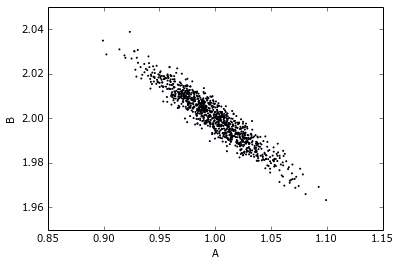

In [181]:
scatter(A, B, s=1.0)
xlabel("A")
ylabel("B")

In [182]:
best_A =  mean(A)
best_B =  mean(B)

In [183]:
def y_fit(x):
    return best_A + best_B*x

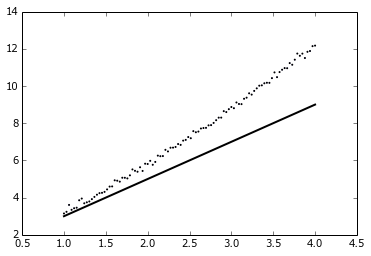

In [184]:
scatter(x1, dy, s=1.0)
plot(x1, y_fit(x1), lw=2.0, c='k')

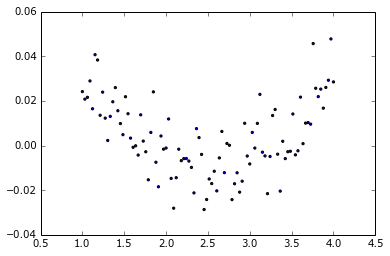

In [113]:
residuals = (dy-y_fit(x1))/(N_points * 0.1)
scatter(x1, residuals, s=5)

In [114]:
def xi2dist(xi, k):
    pxi = np.log10(1/(2**(k/2.0) * gamma(k/2.0)) * xi**(k/2.0-1.0)*exp(-xi/2.0))
    return pxi

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


(0, 2)

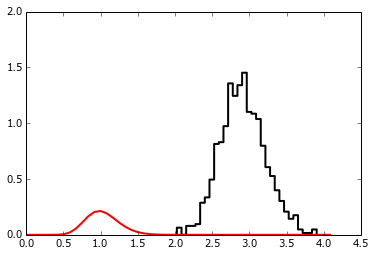

In [115]:
h3 = hist(xi2/98.0, bins=30, histtype='step', lw=2, color='k', normed=True)

xi_t = linspace(0, 400)
xi2_teo = xi2dist(xi_t, 98.0)
plot(xi_t/98.0, exp(xi2_teo), lw=2.0, c='r')
ylim(0, 2)


In [185]:
def xisquare_f(sigma, x, y):
    aa = np.linspace(1-3, 1+3, 500)
    bb = np.linspace(2-3, 2+3, 500)
    xi = np.zeros([len(aa), len(bb)])
    for i in range(len(aa)):
        for j in range(len(bb)):
            xi[i][j] = sum((y_fit(x1)-aa[i]-bb[j]*x)**2/sigma**2) - sum((y_fit(x1)-best_A-best_B*x)**2/sigma**2)
    return xi, aa, bb

In [186]:
xi2_f, AA, BB = xisquare_f(sigma_1, x1, dy)

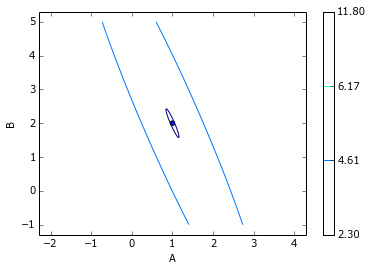

In [188]:
levels=[2.3, 4.61, 6.17, 11.8]
contour(AA, BB, log10(xi2_f), levels=levels)
colorbar()
scatter(1, 2)
xlabel('A')
ylabel('B')